In [2]:
from datasets import load_dataset, concatenate_datasets

ds = load_dataset("BoKelvin/SLAKE", split="test")

{'img_name': ['xmlab102/source.jpg',
  'xmlab102/source.jpg',
  'xmlab102/source.jpg',
  'xmlab102/source.jpg',
  'xmlab102/source.jpg',
  'xmlab102/source.jpg',
  'xmlab102/source.jpg',
  'xmlab102/source.jpg',
  'xmlab102/source.jpg',
  'xmlab102/source.jpg',
  'xmlab102/source.jpg',
  'xmlab103/source.jpg',
  'xmlab103/source.jpg',
  'xmlab103/source.jpg',
  'xmlab103/source.jpg',
  'xmlab103/source.jpg',
  'xmlab103/source.jpg',
  'xmlab103/source.jpg',
  'xmlab103/source.jpg',
  'xmlab103/source.jpg',
  'xmlab103/source.jpg',
  'xmlab105/source.jpg',
  'xmlab105/source.jpg',
  'xmlab105/source.jpg',
  'xmlab105/source.jpg',
  'xmlab105/source.jpg',
  'xmlab105/source.jpg',
  'xmlab105/source.jpg',
  'xmlab105/source.jpg',
  'xmlab105/source.jpg',
  'xmlab105/source.jpg',
  'xmlab124/source.jpg',
  'xmlab124/source.jpg',
  'xmlab124/source.jpg',
  'xmlab124/source.jpg',
  'xmlab124/source.jpg',
  'xmlab124/source.jpg',
  'xmlab124/source.jpg',
  'xmlab13/source.jpg',
  'xmlab13/sou

In [4]:
d_ = ds.select(range(100))

d_[1]

{'img_name': 'xmlab102/source.jpg',
 'location': 'Lung',
 'answer': 'Chest',
 'modality': 'CT',
 'base_type': 'vqa',
 'answer_type': 'OPEN',
 'question': 'Which part of the body does this image belong to?',
 'qid': 11935,
 'content_type': 'Position',
 'triple': ['vhead', '_', '_'],
 'img_id': 102,
 'q_lang': 'en'}

In [19]:
df_train = load_dataset("BoKelvin/SLAKE", split="train")
df_val = load_dataset("BoKelvin/SLAKE", split="validation")
df_test = load_dataset("BoKelvin/SLAKE", split="test")

ds = concatenate_datasets([df_train, df_val, df_test])

ds

Dataset({
    features: ['img_name', 'location', 'answer', 'modality', 'base_type', 'answer_type', 'question', 'qid', 'content_type', 'triple', 'img_id', 'q_lang'],
    num_rows: 14028
})

In [10]:
count = 0

for d in ds:
    if d["q_lang"] != "en":
        count += 1

print(count)

print(len(ds))

1033
2094


In [3]:
ds[0]

{'img_name': 'xmlab102/source.jpg',
 'location': 'Lung',
 'answer': 'CT',
 'modality': 'CT',
 'base_type': 'vqa',
 'answer_type': 'OPEN',
 'question': 'What modality is used to take this image?',
 'qid': 11934,
 'content_type': 'Modality',
 'triple': ['vhead', '_', '_'],
 'img_id': 102,
 'q_lang': 'en'}

In [5]:
ds = load_dataset("flaviagiammarino/path-vqa", split="test")

item = ds[0]

Generating test split: 100%|██████████| 6719/6719 [00:02<00:00, 3105.84 examples/s]


In [12]:
type(ds[3]["image"])

PIL.JpegImagePlugin.JpegImageFile

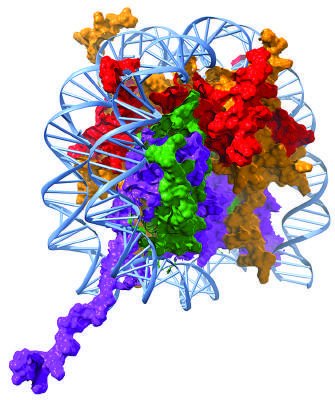

In [14]:
item["image"].convert("RGB")